**Extreme Learning Machine Applied to the Prediction and modelling of Steels using Big Data**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sys


In [2]:
from google.colab import files
# To allow access to read google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


**Import data and target matrix**

In [3]:
# Import input data
input_data = np.genfromtxt('/content/drive/MyDrive/Concrete_Python/Concrete_Data.csv', delimiter=",")
input_data

array([[ 540. ,    0. ,    0. , ..., 1040. ,  676. ,   28. ],
       [ 540. ,    0. ,    0. , ..., 1055. ,  676. ,   28. ],
       [ 332.5,  142.5,    0. , ...,  932. ,  594. ,  270. ],
       ...,
       [ 148.5,  139.4,  108.6, ...,  892.4,  780. ,   28. ],
       [ 159.1,  186.7,    0. , ...,  989.6,  788.9,   28. ],
       [ 260.9,  100.5,   78.3, ...,  864.5,  761.5,   28. ]])

In [4]:
# Import target data
input_target = np.genfromtxt('/content/drive/MyDrive/Concrete_Python/Concrete_Target.csv', delimiter=",")
input_target

array([79.99, 61.89, 40.27, ..., 23.7 , 32.77, 32.4 ])

In [5]:
import numpy as np
import sys
# Converting Input Data to Numpy format
X_unnormalized = input_data
np.shape(X_unnormalized)

Y_target = input_target
np.shape(Y_target)

(1030,)

**Import package for extreme learning machine and libraray for plotting and normalization** 

In [6]:
#  Include this to copy elm into your workspace
!cp /content/drive/MyDrive/Concrete_Python/elm.py /content

import elm
from sklearn.model_selection import train_test_split # Split data 
from sklearn.preprocessing import StandardScaler # Normalizing data
import matplotlib.pyplot as plt # Plotting
from sklearn.preprocessing import MinMaxScaler # Normalizing data

**Normalize the data to normal distribution**

In [7]:
# Using Normal distribution
normalise_G = StandardScaler()
X_normalized = normalise_G.fit_transform(X_unnormalized)
#np.amin(X_normalized)
#np.amax(X_normalized)

#scaler = MinMaxScaler()
#scaler.fit(X_unnormalized)
#X_normalized= scaler.transform(X_unnormalized)

**Divide training and testing part**

In [8]:
x_train, x_test, y_train, y_test = train_test_split(X_normalized, Y_target, test_size=0.3)
print(x_train.shape,y_train.shape, x_test.shape,y_test.shape)

(721, 8) (721,) (309, 8) (309,)


**Training the model**

In [9]:
# Define parameters for training the PNN
model = elm.elm(hidden_units=30, activation_function='sigmoid', random_type='normal', x=x_train, y=y_train, C=5.23, elm_type='reg') 
# Train the PNN with ELM
beta, train_score, running_time = model.fit('solution2')
print("regression beta:\n", beta)
print("regression train score:", train_score)
print("regression running time:", running_time)

regression beta:
 [-16.58454919   6.93330209 -22.58427681   8.33805253  -4.60735081
  38.61543702  -9.09287704 -15.32136914 -22.87025614 -13.24733092
  10.08889019  13.66331652 -15.816516     2.74626001   0.63880848
 -15.39219014  -3.58042797  28.23667348  20.31285062  15.36132792
 -18.59323255 -12.36063625 -11.13972436  17.72209675  23.07294755
   5.88827824 -13.34548222  14.95264957 -18.78523913  54.19387059]
regression train score: 9.271574607995177
regression running time: 0.021002999999999883


**Calculate R2**

In [ ]:
from sklearn.metrics import r2_score
r2 = r2_score(prediction, y_test)
r2

**Plot the result of training**

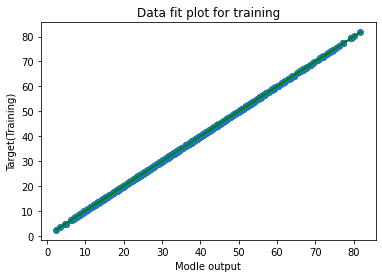

In [10]:
plt.scatter(model.y, y_train)
plt.plot(model.y, model.y,'g-') # Reference line
plt.title("Data fit plot for training")
plt.xlabel("Modle output")
plt.ylabel("Target(Training)")
plt.show()

regression score: 9.271574607995177
(721,) (309,)


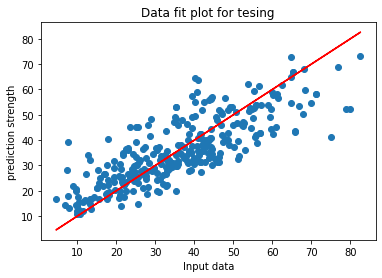

In [11]:
prediction = model.predict(x_test)
#print("regression result:", prediction.reshape(-1, ))
print("regression score:", model.score(x_test, y_test))

plt.scatter(y_test,prediction)
plt.plot(y_test, y_test,'r-')
plt.title("Data fit plot for tesing")
plt.xlabel("Input data")
plt.ylabel("prediction strength")
print(model.y.shape, y_test.shape)

**Show the correlaiton of input data**

<function matplotlib.pyplot.show>

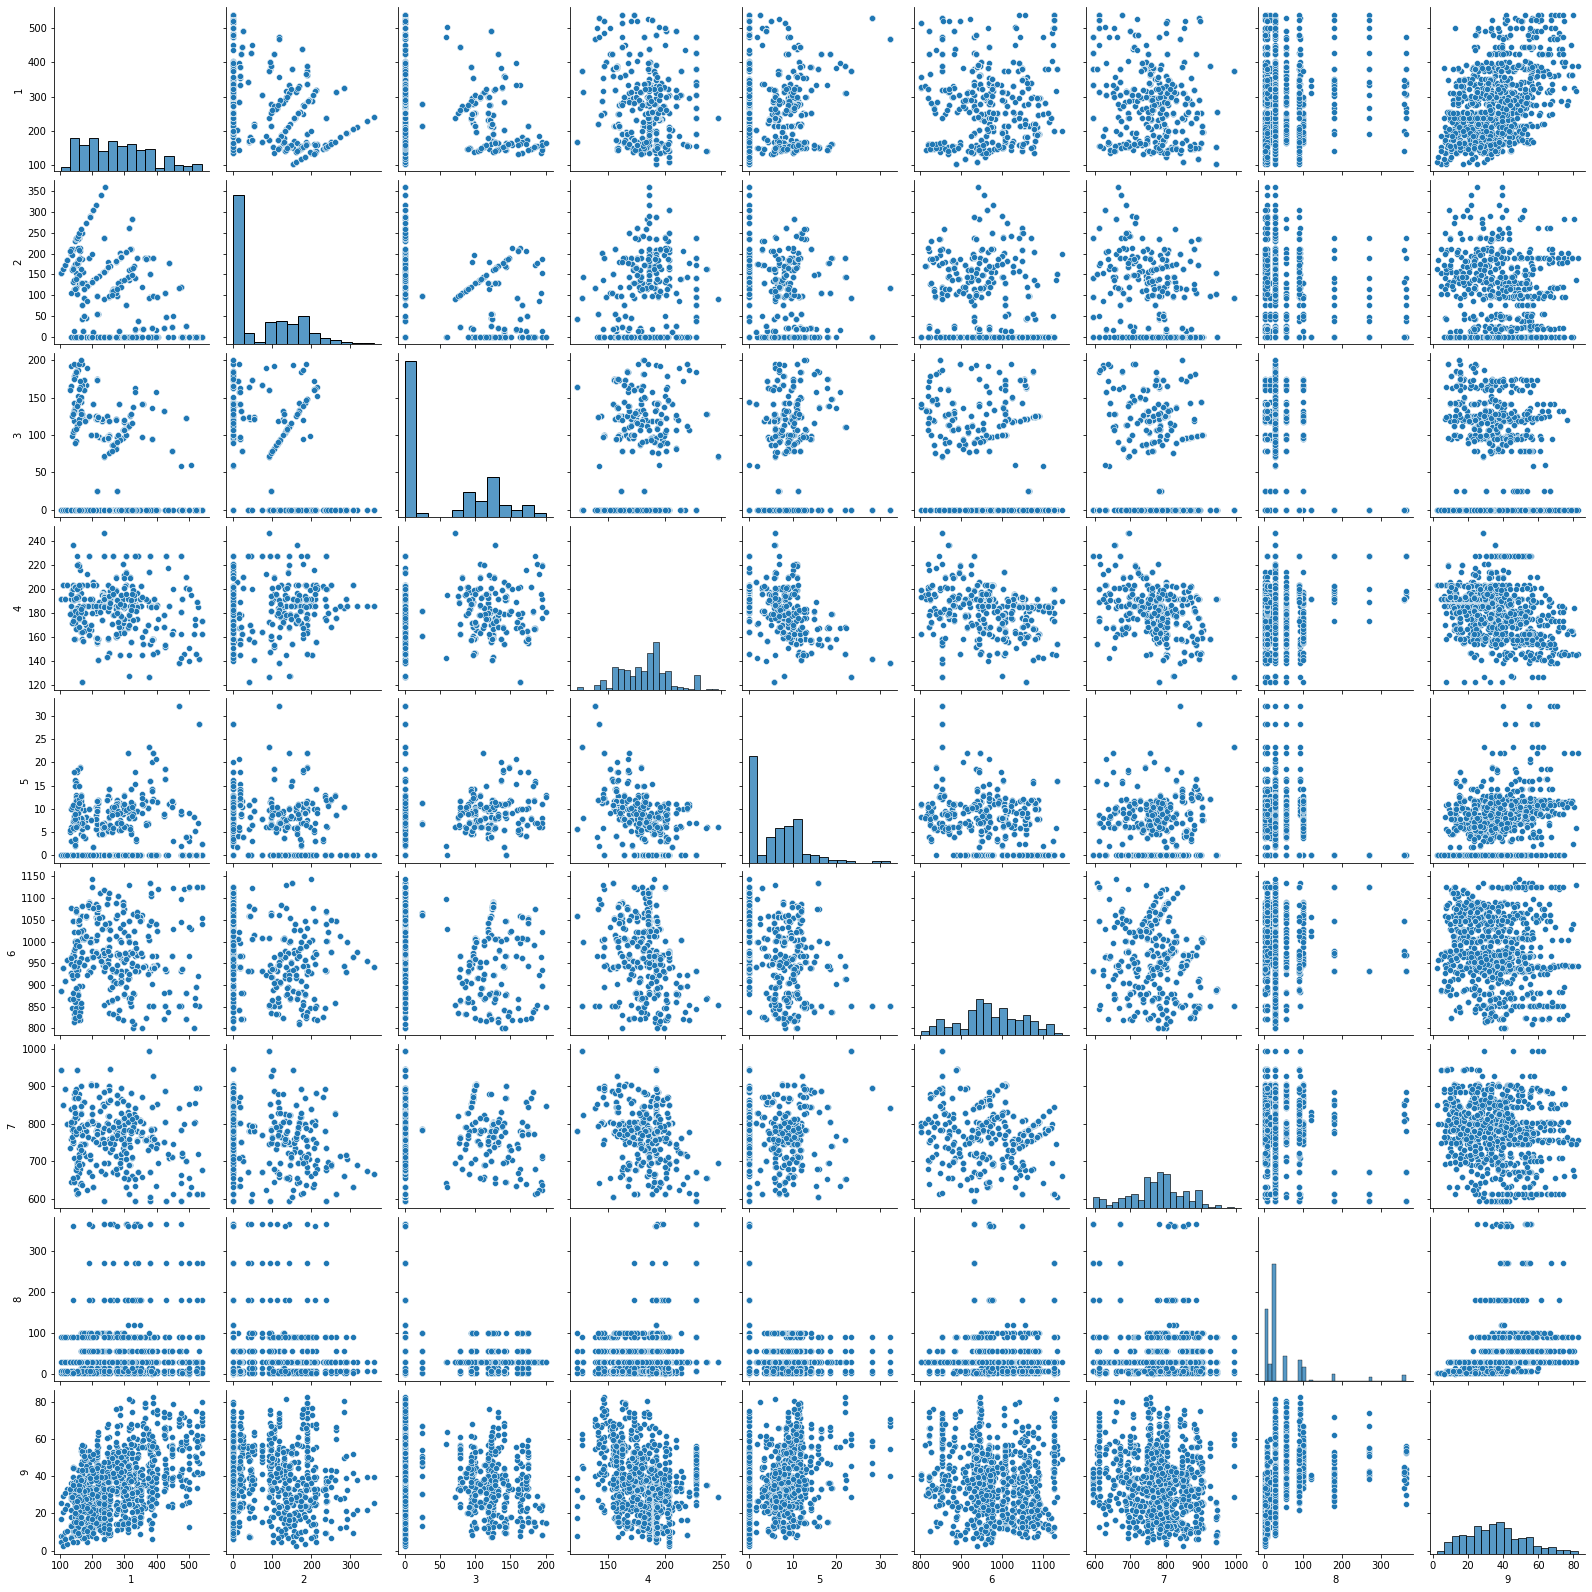

In [12]:
import seaborn as sns
import pandas as pd
# Basic correlogram
# sns.pairplot(X)
# plt.show()
all_data = np.genfromtxt('/content/drive/MyDrive/Concrete1.csv', delimiter=",")
#numpy_data = np.array([[1, 2], [3, 4]])
df = pd.DataFrame(data=all_data, columns=["1", "2","3", "4","5", "6","7", "8","9"])
sns.pairplot(df)
plt.show

**Heatmap of input data**


                       Cement   Blast Furnace Slag   Fly Ash      Water  \
Cement                1.000000            -0.275216 -0.397467 -0.081587   
Blast Furnace Slag   -0.275216             1.000000 -0.323580  0.107252   
Fly Ash              -0.397467            -0.323580  1.000000 -0.256984   
Water                -0.081587             0.107252 -0.256984  1.000000   
Superplasticizer      0.092386             0.043270  0.377503 -0.657533   
Coarse Aggregate     -0.109349            -0.283999 -0.009961 -0.182294   
Fine Aggregate       -0.222718            -0.281603  0.079108 -0.450661   
Age                   0.081946            -0.044246 -0.154371  0.277618   
Compressive strength  0.497832             0.134829 -0.105755 -0.289633   

                      Superplasticizer  Coarse Aggregate  Fine Aggregate  \
Cement                        0.092386         -0.109349       -0.222718   
Blast Furnace Slag            0.043270         -0.283999       -0.281603   
Fly Ash              

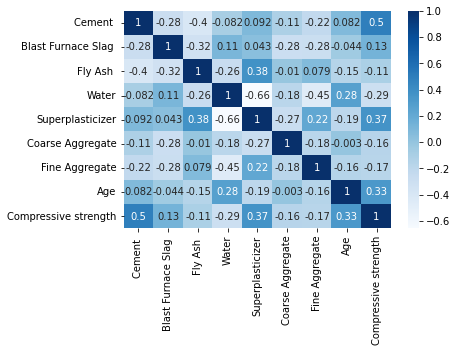

In [17]:
# import modules
import matplotlib.pyplot as mp
import pandas as pd
import seaborn as sb
  
# import file with data
data = pd.read_csv('/content/drive/MyDrive/Concrete_Python/Concrete_Data_raw.csv')
# prints data that will be plotted
print(data.corr())
# plotting correlation heatmap
dataplot = sb.heatmap(data.corr(),cmap="Blues", annot=True)
# displaying heatmap
mp.show()